<a href="https://colab.research.google.com/github/KilledByBugs/CE888_labs/blob/main/lab8_task2_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget = "https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip"

--2021-03-12 23:54:32--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-03-12 23:54:32--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-03-12 23:54:32--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M  77.2MB/s    in 

In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import os

for name in ["cats","dogs","Humans","horses"]:
  # Get all the paths
  data_dir_list = os.listdir('/content/data/'+ name)
  #print(data_dir_list)
  path, dirs, files = next(os.walk("/content/data/"+name))
  file_count = len(files)
  print(file_count)

202
202
202
202


In [4]:
# Make new base directory
original_dataset_dir = '/content/data' #GUANNAN: this will change later
base_dir = '/content/cats_dogs_humans_and_horses'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
import shutil

original_dataset_dir = '/content/data/cats'
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
original_dataset_dir = '/content/data/dogs'
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/Humans'
fnames = ['rider-{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/horses'
fnames = ['horse-{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [7]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0
    else : 
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3   

In [9]:
def createDataSplitSet(datapath):
    X=[]
    y=[]
    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [10]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(264, 224, 224, 3)
(264, 224, 224, 3)
(272, 224, 224, 3)


In [11]:
## Xception

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [12]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

91889664/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [13]:
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [16]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=20, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/20
14/14 [==============================] - 38s 262ms/step - loss: 0.8612 - acc: 0.6824 - val_loss: 0.1803 - val_acc: 0.9508
Epoch 2/20
14/14 [==============================] - 2s 151ms/step - loss: 0.0888 - acc: 0.9739 - val_loss: 0.1312 - val_acc: 0.9621
Epoch 3/20
14/14 [==============================] - 2s 152ms/step - loss: 0.0348 - acc: 0.9922 - val_loss: 0.0853 - val_acc: 0.9697
Epoch 4/20
14/14 [==============================] - 2s 153ms/step - loss: 0.0183 - acc: 0.9922 - val_loss: 0.1023 - val_acc: 0.9659
Epoch 5/20
14/14 [==============================] - 2s 153ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0989 - val_acc: 0.9773
Epoch 6/20
14/14 [==============================] - 2s 154ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0993 - val_acc: 0.9697
Epoch 7/20
14/14 [==============================] - 2s 153ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0987 - val_acc: 0.9735
Epoch 8/20
14/14 [==============================] - 2s 153ms/step - loss: 0

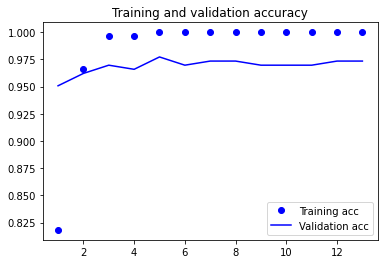

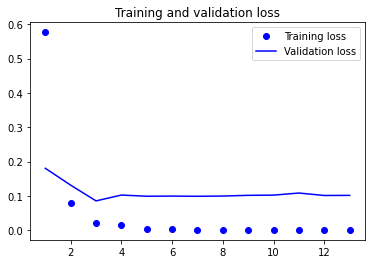

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_y

array([1, 1, 1, 3, 0, 2, 0, 1, 2, 0, 3, 3, 3, 0, 3, 3, 2, 1, 2, 0, 2, 0,
       0, 2, 1, 2, 0, 2, 0, 1, 3, 2, 1, 1, 3, 0, 3, 0, 3, 1, 2, 1, 3, 3,
       2, 3, 1, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 2, 2, 1, 2, 1, 3, 0, 0, 2,
       0, 3, 3, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 3, 1, 3, 1, 3, 0, 0,
       0, 2, 2, 3, 1, 1, 3, 0, 2, 1, 2, 3, 3, 1, 3, 1, 0, 2, 1, 3, 2, 2,
       2, 2, 3, 2, 0, 2, 1, 2, 2, 3, 2, 2, 3, 2, 0, 0, 3, 3, 2, 2, 3, 1,
       1, 1, 1, 0, 2, 0, 3, 3, 2, 3, 3, 1, 2, 2, 1, 3, 0, 2, 1, 2, 3, 3,
       2, 2, 0, 3, 2, 0, 1, 1, 1, 0, 2, 0, 3, 3, 3, 1, 0, 1, 0, 1, 0, 2,
       3, 2, 2, 1, 2, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 2, 3, 2, 0, 2, 3, 0,
       1, 0, 3, 1, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 3, 1, 3, 1, 0, 0, 1, 2,
       1, 3, 1, 3, 2, 0, 1, 1, 1, 1, 3, 0, 3, 3, 2, 1, 0, 2, 3, 0, 0, 2,
       0, 0, 1, 2, 1, 3, 0, 0, 1, 2, 1, 0, 1, 0, 3, 2, 3, 2, 2, 2, 0, 1,
       2, 0, 3, 3, 0, 1, 0, 2])

In [21]:
predictions

array([[4.4744325e-04, 9.9952042e-01, 2.4714491e-05, 7.5075850e-06],
       [1.5861979e-05, 9.9990714e-01, 5.0274361e-05, 2.6701913e-05],
       [2.8370736e-02, 9.7117221e-01, 1.5649988e-04, 3.0056442e-04],
       ...,
       [1.6558747e-01, 8.3150530e-01, 1.9721118e-04, 2.7099981e-03],
       [9.9785477e-01, 2.1102293e-03, 2.4235638e-05, 1.0703902e-05],
       [3.6227909e-06, 2.2379028e-04, 9.9953198e-01, 2.4052963e-04]],
      dtype=float32)

In [18]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

ValueError: ignored